In [4]:
import json
import os
import pandas as pd
import numpy as np
import json
import watson_developer_cloud.natural_language_understanding.features.v1 as Features
import pdfminer
import textract
import re
import glob


from flask import jsonify
from scipy.spatial.distance import cdist
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import hierarchical, KMeans, MeanShift
from sklearn.model_selection import train_test_split
from watson_developer_cloud import NaturalLanguageUnderstandingV1

import matplotlib.pyplot as plt
%matplotlib inline


# THis has remoeved all the excess text processing by saving it to as csv. Much faster to load!
df = pd.read_csv(r'C:\Users\austi\Documents\data.csv')


clus_train, clus_test = train_test_split(df, test_size=.3, random_state=123)


# In[26]:

from scipy.spatial.distance import cdist
clusters=range(1,20)
meandist=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

# This plots error as we increase clusters

# plt.plot(clusters, meandist)
# plt.xlabel('Number of clusters')
# plt.ylabel('Average distance')
# plt.title('Selecting k with the Elbow Method')




model3=KMeans(n_clusters=15)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

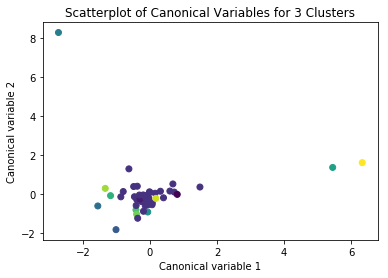

In [5]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()


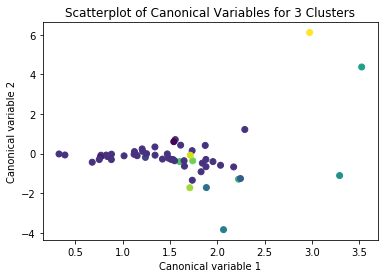

In [6]:
from sklearn.decomposition import TruncatedSVD
pca_2 = TruncatedSVD(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()